**Pressione SHIFT+ENTER para executar a célula**

# Alegrete

Este notebook fornece algumas visualizações para o trabalho de regressão linear. Para conseguir usar, implemente as funções no seu `alegrete.py` e tenha as bibliotecas `numpy` e `matplotlib` instaladas.

O notebook usa um conjunto de dados sintetico. Adapte-o para carregar e usar os dados do `alegrete.csv`.

### Imports das bibliotecas de plot e da solucao implementada

In [ ]:
%matplotlib inline
from IPython.display import HTML
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

import alegrete

### Visualizacao dos dados

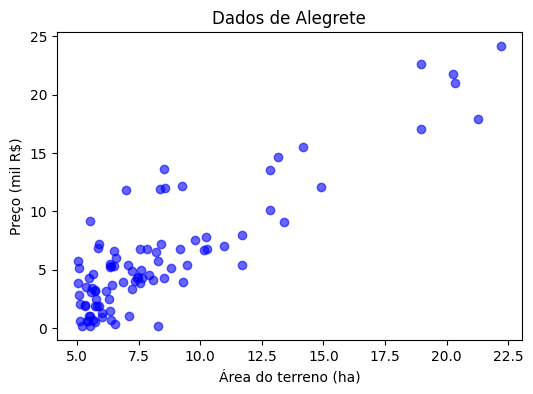

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("alegrete.csv")
dataset = df.values

plt.figure(figsize=(6, 4))
plt.scatter(dataset[:, 0], dataset[:, 1], color="blue", alpha=0.6)
plt.xlabel("Área do terreno (ha)")
plt.ylabel("Preço (mil R$)")
plt.title("Dados de Alegrete")
plt.show()

### Execucao da regressao linear e calculo do EQM por epoca/iteracao

Considere o parâmetro b o coeficiente linear (theta_0, visto em aula) e w o coeficiente angular (theta_1, visto em aula).

EQM final: 3.1335555873715533e+242
theta0 (b): -1.890010960288322e+119
theta1 (w): -1.9114223301858543e+120


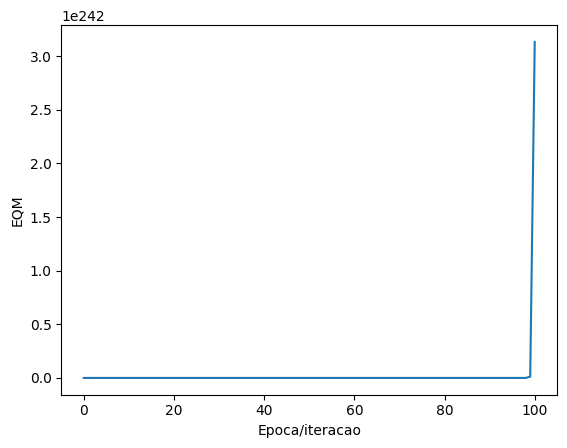

In [ ]:
b_history, w_history = alegrete.fit(
    dataset, b=0, w=0,
    alpha=0.1, num_iterations=100
)

final_b, final_w = b_history[-1], w_history[-1]

mse_list = [alegrete.compute_mse(b, w, dataset) for b, w in zip(b_history, w_history)]
print(f"EQM final: {mse_list[-1]}")
print("theta0 (b):", final_b)
print("theta1 (w):", final_w)


plt.plot(mse_list)
plt.xlabel('Epoca/iteracao')
plt.ylabel('EQM')
plt.show()

### Plot da curva final

Curva encontrada: -1.9114223301858543e+120*x + -1.890010960288322e+119


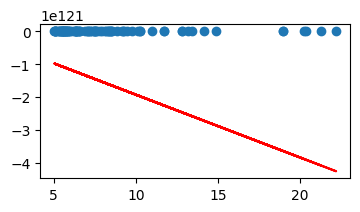

In [ ]:
print (f'Curva encontrada: {final_w}*x + {final_b}')

plt.figure(figsize=(4, 2))
plt.scatter(dataset[:,0], dataset[:,1])

pred = final_w*dataset[:,0] + final_b
plt.plot(dataset[:,0], pred, c='r')
plt.show()




### Progresso da descida do gradiente com o número de iterações

Execute a celula e use os controles abaixo do grafico para visualizar o progresso do seu ajuste

Pode aparecer um grafico "extra" abaixo da animacao, apenas ignore.

/tmp/ipython-input-1673762163.py:18: UserWarning: You passed in an explicit save_count=50 which is being ignored in favor of frames=101.
  ani = animation.FuncAnimation(fig, animate, frames=len(b_history), interval=20, save_count=50)


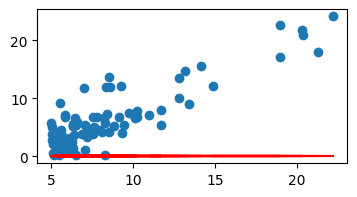

In [ ]:
fig = plt.figure(figsize=(4, 2))
ax = fig.add_subplot(111)

ax.scatter(dataset[:,0], dataset[:,1])

pred = w_history[0]*dataset[:,0] + b_history[0]
line, = ax.plot(dataset[:,0], pred, '-',c='r')

def animate(i):
    pred = w_history[i] * dataset[:,0] + b_history[i]
    line.set_ydata(pred)
    return line,

ani = animation.FuncAnimation(fig, animate, frames=len(b_history), interval=20, save_count=50)
HTML(ani.to_jshtml())